In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Stock Prices Data Set.csv')
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [3]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [5]:
df['open'].mean()

np.float64(86.35227481611624)

In [8]:
df['open'].fillna(df['open'].median(), inplace=True) 

C:\Users\Rohan\AppData\Local\Temp\ipykernel_12752\431369121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['open'].fillna(df['open'].median(), inplace=True)


In [9]:
df.isnull().sum()

symbol    0
date      0
open      0
high      8
low       8
close     0
volume    0
dtype: int64

In [11]:
df['high'].fillna(df['high'].mean(), inplace=True)

In [12]:
df['low'].fillna(df['low'].mean(), inplace=True)

In [13]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [15]:
df.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [16]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

symbol            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.head()

,symbol,date,open,high,low,close,volume,year,month,day
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,2014,1,2
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,2014,1,2
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,2014,1,2
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,2014,1,2
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,2014,1,2


In [19]:
y = df['close']

In [23]:
X = df.drop(columns=['symbol', 'date', 'close'])

In [25]:
X.boxplot()

<Axes: >

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [33]:
X

,open,high,low,volume,year,month,day
0,25.0700,25.8200,25.0600,8998943,2014,1,2
1,79.3828,79.5756,78.8601,58791957,2014,1,2
2,110.3600,111.8800,109.2900,542711,2014,1,2
3,52.1200,52.3300,51.5200,4569061,2014,1,2
4,70.1100,70.2300,69.4800,1148391,2014,1,2
...,...,...,...,...,...,...,...
497467,68.5300,68.8000,67.9200,1046677,2017,12,29
497468,82.6400,82.7100,81.5900,1347613,2017,12,29
497469,121.7500,121.9500,120.6200,1023624,2017,12,29
497470,51.2800,51.5500,50.8100,1261916,2017,12,29


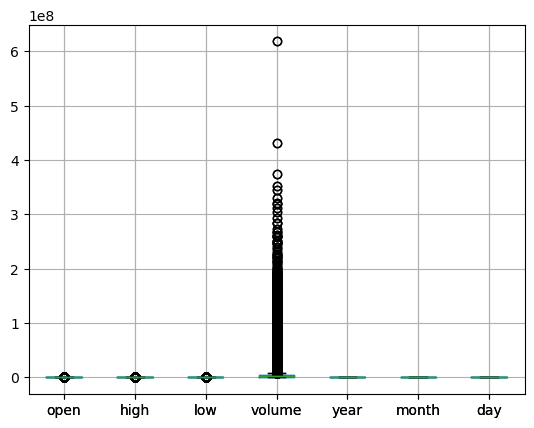

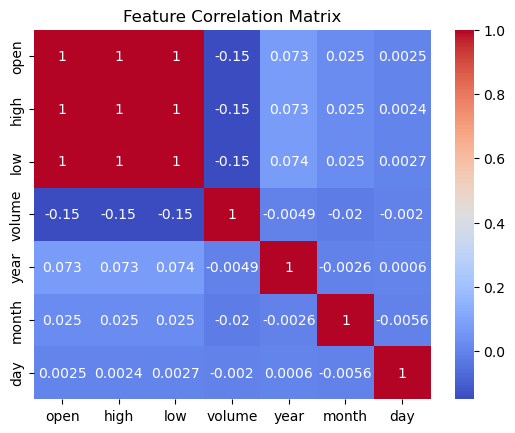

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [37]:
X = df.drop(columns=['symbol', 'date', 'close'])
y = df['close']

In [38]:
X = X.drop(columns=['year', 'month', 'day'])

In [39]:
import numpy as np

X['volume_log'] = np.log1p(X['volume'])
X = X.drop(columns=['volume'])

In [40]:
corr_with_target = X.corrwith(y)
print(corr_with_target)

open          0.999856
high          0.999918
low           0.999922
volume_log   -0.305899
dtype: float64


In [41]:
X = X[['open', 'high', 'low', 'volume_log']]

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_final = scaler.fit_transform(X)

X_final = pd.DataFrame(X_final, columns=X.columns)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
# Features and target
X = X_final      # preprocessed & scaled features
y = y            # closing price

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = model.predict(X_test)

In [48]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9999490978288418


In [49]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5276976504960293


In [50]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)

      Feature  Coefficient
0        open   -54.201365
1        high    79.745676
2         low    75.921288
3  volume_log    -0.002379


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final,     # features
    y,           # target
    test_size=0.2,
    random_state=42
)

In [53]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (397977, 4)
Testing set size: (99495, 4)


In [54]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [55]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
y_pred = knn.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [61]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

